In [1]:
# Biblioteca para baixar arquivos do Google Drive
!pip install gdown

In [2]:
import os, gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_file = 'card_transdata.csv'

if not os.path.exists(csv_file):
    # Baixa o arquivo do Google Drive
    print(f"Baixando {csv_file}...")
    gdown.download(id='1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM', output=csv_file)
else:
    print(f'Arquivo {csv_file} já se encontrado')

Baixando card_transdata.csv...


Downloading...
From: https://drive.google.com/uc?id=1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM
To: /content/card_transdata.csv
100%|██████████| 76.3M/76.3M [00:00<00:00, 92.8MB/s]


In [3]:
dataframe = pd.read_csv(csv_file)

print(f"Arquivo CSV carregado.")

dataframe.head()

Arquivo CSV carregado.


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
print("Verificando valores nulos no dataset:")
dataframe.isnull().sum()

Verificando valores nulos no dataset:


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier

In [6]:
variaveis_limpas = [
    'ratio_to_median_purchase_price',
    'online_order',
    'distance_from_home',
    'used_pin_number'
]

X = dataframe[variaveis_limpas]

Y = dataframe['fraud']

print(f"Variaveis (X) selecionadas: {list(X.columns)}")
print(f"Alvo (Y): ['fraud']")

Variaveis (X) selecionadas: ['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'used_pin_number']
Alvo (Y): ['fraud']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(f"Tamanho dos dados de treino: {X_train_scaled.shape[0]} amostras")
print(f"Tamanho dos dados de teste: {X_test_scaled.shape[0]} amostras")

Tamanho dos dados de treino: 700000 amostras
Tamanho dos dados de teste: 300000 amostras


In [8]:
modelo_sklearn = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='sgd',
    batch_size=105,
    max_iter=100,
    random_state=42,
    verbose=True
)

print(modelo_sklearn)

MLPClassifier(batch_size=105, hidden_layer_sizes=(10,), max_iter=100,
              random_state=42, solver='sgd', verbose=True)


In [9]:
print("Iniciando o treinamento do MLPClassifier...")

modelo_sklearn.fit(X_train_scaled, y_train)

print("Treinamento concluído.")

Iniciando o treinamento do MLPClassifier...
Iteration 1, loss = 0.14572942
Iteration 2, loss = 0.10200289
Iteration 3, loss = 0.09784292
Iteration 4, loss = 0.09489010
Iteration 5, loss = 0.09200935
Iteration 6, loss = 0.08903796
Iteration 7, loss = 0.08644465
Iteration 8, loss = 0.08433414
Iteration 9, loss = 0.08248160
Iteration 10, loss = 0.08087352
Iteration 11, loss = 0.07948635
Iteration 12, loss = 0.07828474
Iteration 13, loss = 0.07723536
Iteration 14, loss = 0.07632732
Iteration 15, loss = 0.07550899
Iteration 16, loss = 0.07474395
Iteration 17, loss = 0.07405831
Iteration 18, loss = 0.07343255
Iteration 19, loss = 0.07286017
Iteration 20, loss = 0.07233989
Iteration 21, loss = 0.07183919
Iteration 22, loss = 0.07139270
Iteration 23, loss = 0.07099907
Iteration 24, loss = 0.07064976
Iteration 25, loss = 0.07032302
Iteration 26, loss = 0.06997708
Iteration 27, loss = 0.06970258
Iteration 28, loss = 0.06940341
Iteration 29, loss = 0.06912448
Iteration 30, loss = 0.06888214
Itera

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


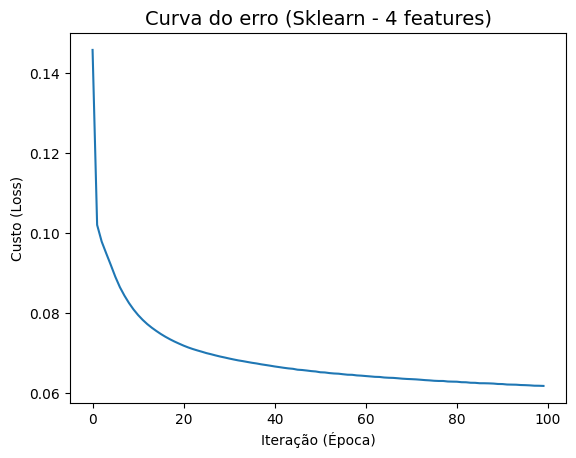

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(modelo_sklearn.loss_curve_)
plt.title("Curva do erro (Sklearn - 4 features)", fontsize=14)
plt.xlabel('Iteração (Época)')
plt.ylabel('Custo (Loss)')
plt.show()

In [11]:
classes_previstas = modelo_sklearn.predict(X_test_scaled)

print("Previsões (primeiras 20):")
print(classes_previstas[:20])

Previsões (primeiras 20):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
cf_matrix = confusion_matrix(y_test, classes_previstas, normalize='pred')

print("Matriz de Confusão Normalizada (Sklearn - 4 features):")
print(cf_matrix)

Matriz de Confusão Normalizada (Sklearn - 4 features):
[[0.98759224 0.09744955]
 [0.01240776 0.90255045]]


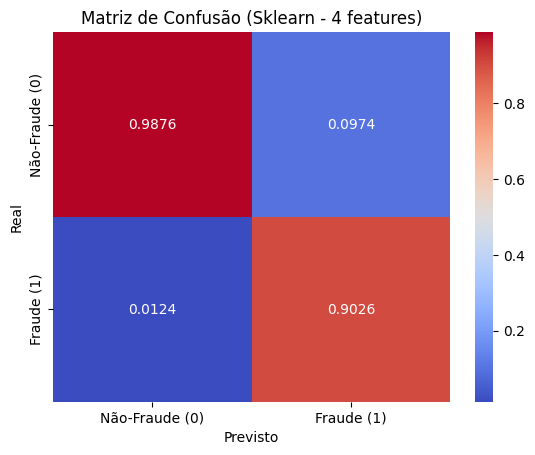

In [13]:
import seaborn as sns

plt.figure()
false_true = ['Não-Fraude (0)', 'Fraude (1)']
sns.heatmap(cf_matrix, annot=True, fmt='.4f', cmap='coolwarm',
            xticklabels=false_true, yticklabels=false_true)
plt.title("Matriz de Confusão (Sklearn - 4 features)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()